<a href="https://colab.research.google.com/github/kellyclemos/Desenvolve-2024-Projeto-Pratico-Dados/blob/main/Projeto_Pr%C3%A1tico_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <font color=blue size=10> 2º Projeto Prático - Dados
</font>



# <font color=blue> 1 - Análise de Dados e Predição com Python e Pandas
 </font>

### <font color=blue>1.1 EXECUÇÃO</font>

In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [178]:
df = pd.read_csv('/content/base-alugueis-sp.csv')

In [179]:
df

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200


In [180]:
df.isnull().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

In [181]:
novos_nomes = {
    'address': 'Endereço',
    'district': 'Cidade',
    'area': 'Área',
    'bedrooms' : 'Quartos' ,
    'garage' : 'Garagem' ,
    'type' : 'Tipo',
    'rent' : 'Aluguel',
    'total' : 'Total',
}
df.rename(columns=novos_nomes, inplace=True)

In [182]:
df

,Endereço,Cidade,Área,Quartos,Garagem,Tipo,Aluguel,Total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200


In [183]:
df.shape[0]

11657

In [184]:
df.dropna(inplace=True)
df

,Endereço,Cidade,Área,Quartos,Garagem,Tipo,Aluguel,Total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200


In [185]:
df.duplicated().sum()

0

In [186]:
print(df.dtypes)

Endereço    object
Cidade      object
Área         int64
Quartos      int64
Garagem      int64
Tipo        object
Aluguel      int64
Total        int64
dtype: object


In [187]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
    mean = df[col].mean()
    std_dev = df[col].std()
    df = df[(df[col] > mean - 3 * std_dev) & (df[col] < mean + 3 * std_dev)]

In [188]:
df

,Endereço,Cidade,Área,Quartos,Garagem,Tipo,Aluguel,Total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11651,São José,Alto da Boa Vista,158,4,2,Apartamento,6500,8929
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200


In [189]:
string_columns = df.select_dtypes(include=['object']).columns

for col in string_columns:
    df[col] = df[col].str.strip().str.lower()

In [190]:
df


,Endereço,Cidade,Área,Quartos,Garagem,Tipo,Aluguel,Total
0,rua herval,belenzinho,21,1,0,studio e kitnet,2400,2939
1,avenida são miguel,vila marieta,15,1,1,studio e kitnet,1030,1345
2,rua oscar freire,pinheiros,18,1,0,apartamento,4000,4661
3,rua júlio sayago,vila ré,56,2,2,casa em condomínio,1750,1954
4,rua barata ribeiro,bela vista,19,1,0,studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11651,são josé,alto da boa vista,158,4,2,apartamento,6500,8929
11652,avenida adolfo pinheiro,santo amaro,94,2,1,apartamento,4100,5778
11654,rua abílio borin,jardim caravelas,84,1,2,apartamento,4500,5467
11655,rua forte william,jardim fonte do morumbi,76,1,0,apartamento,9000,10200


In [191]:
df.head()

,Endereço,Cidade,Área,Quartos,Garagem,Tipo,Aluguel,Total
0,rua herval,belenzinho,21,1,0,studio e kitnet,2400,2939
1,avenida são miguel,vila marieta,15,1,1,studio e kitnet,1030,1345
2,rua oscar freire,pinheiros,18,1,0,apartamento,4000,4661
3,rua júlio sayago,vila ré,56,2,2,casa em condomínio,1750,1954
4,rua barata ribeiro,bela vista,19,1,0,studio e kitnet,4000,4654


In [192]:
df.describe()

,Área,Quartos,Garagem,Aluguel,Total
count,10698.000000,10698.000000,10698.000000,10698.000000,10698.000000
mean,70.382595,1.840437,0.875117,2654.292765,3332.480464
std,47.500796,0.811863,0.876349,1530.281698,1918.097610
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1500.000000,1912.000000
50%,56.000000,2.000000,1.000000,2250.000000,2859.000000
75%,82.000000,2.000000,1.000000,3400.000000,4227.000000
max,302.000000,4.000000,4.000000,10000.000000,10290.000000


In [193]:
print(df['Cidade'].value_counts())
print(df['Tipo'].value_counts())




Cidade
bela vista                     345
vila mariana                   213
centro                         177
jardim paulista                152
pinheiros                      147
                              ... 
vila catupia                     1
vila progresso (zona norte)      1
jardim valeria                   1
horto florestal                  1
vila elvira                      1
Name: count, Length: 1156, dtype: int64
Tipo
apartamento           6666
casa                  2455
studio e kitnet       1376
casa em condomínio     201
Name: count, dtype: int64


In [194]:
df[['Área', 'Quartos', 'Garagem', 'Aluguel', 'Total']].mean()

Área         70.382595
Quartos       1.840437
Garagem       0.875117
Aluguel    2654.292765
Total      3332.480464
dtype: float64

In [195]:
df[['Área', 'Quartos', 'Garagem', 'Aluguel', 'Total']].median()

Área         56.0
Quartos       2.0
Garagem       1.0
Aluguel    2250.0
Total      2859.0
dtype: float64

In [196]:
df[['Área', 'Quartos', 'Garagem', 'Aluguel', 'Total']].mode()

,Área,Quartos,Garagem,Aluguel,Total
0,50.0,2.0,1.0,1500,1042.0
1,NaN,NaN,NaN,3000,NaN


In [197]:
df[['Área', 'Quartos', 'Garagem', 'Aluguel', 'Total']].std()

Área         47.500796
Quartos       0.811863
Garagem       0.876349
Aluguel    1530.281698
Total      1918.097610
dtype: float64

In [198]:
df[['Área', 'Quartos', 'Garagem', 'Aluguel', 'Total']].var()

Área       2.256326e+03
Quartos    6.591219e-01
Garagem    7.679869e-01
Aluguel    2.341762e+06
Total      3.679098e+06
dtype: float64

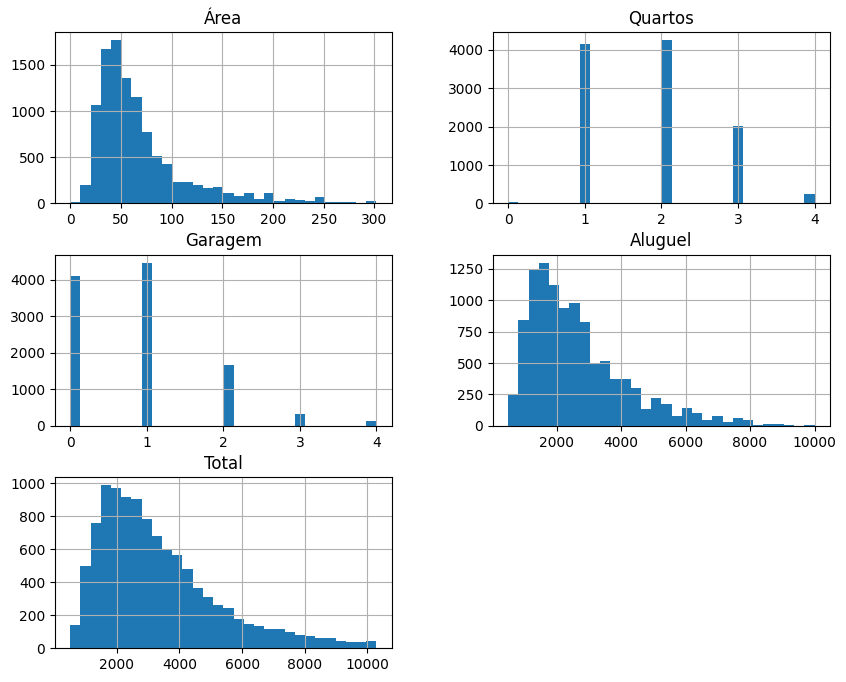

In [199]:
df[['Área', 'Quartos', 'Garagem', 'Aluguel', 'Total']].hist(bins=30, figsize=(10, 8))
plt.show()


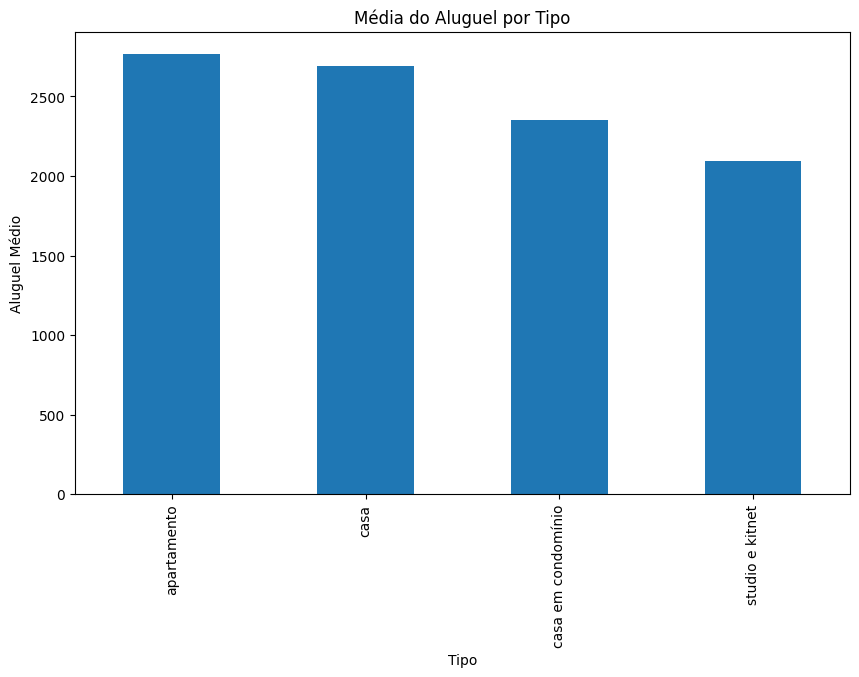

In [258]:


df.groupby('Tipo')['Aluguel'].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Média do Aluguel por Tipo')
plt.ylabel('Aluguel Médio')
plt.show()




In [200]:
df_top = df.copy()


In [201]:
aluguel_medio_por_cidade = df_top.groupby('Cidade')['Aluguel'].mean()

In [202]:
top_cidades = aluguel_medio_por_cidade.nlargest(10)

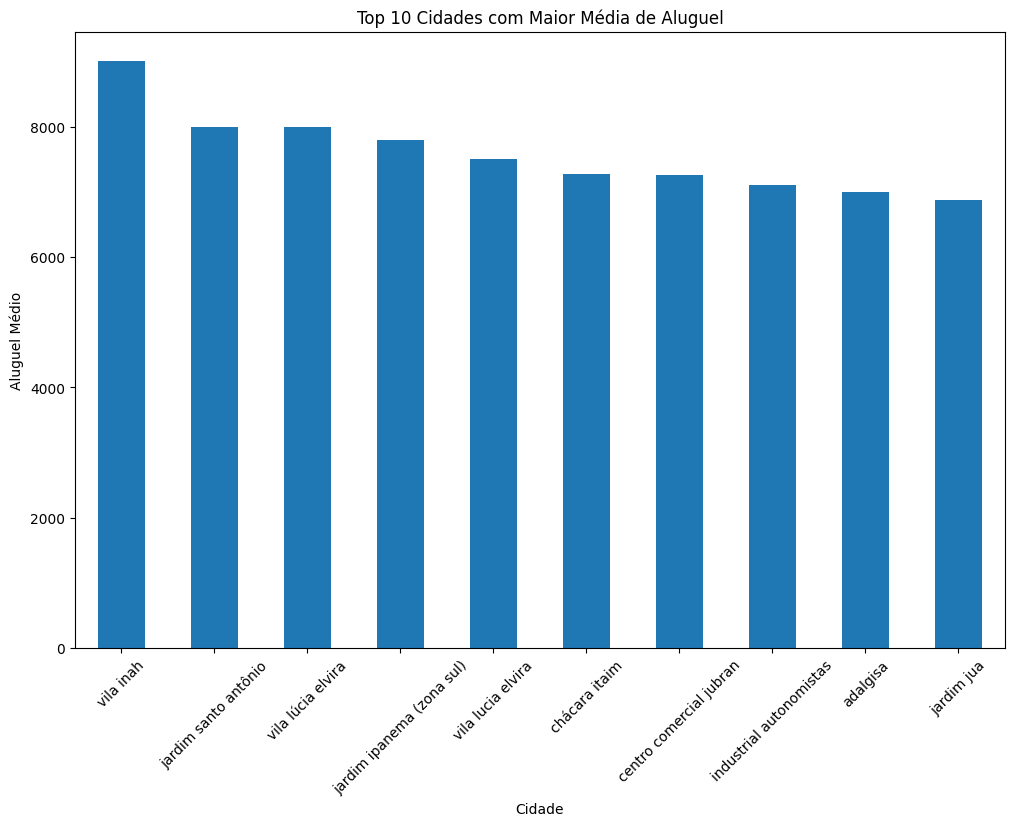

In [203]:
plt.figure(figsize=(12, 8))
top_cidades.plot(kind='bar')
plt.title('Top 10 Cidades com Maior Média de Aluguel')
plt.ylabel('Aluguel Médio')
plt.xlabel('Cidade')
plt.xticks(rotation=45)
plt.show()

In [204]:
top_cidades = aluguel_medio_por_cidade.nlargest(10)
top_cidades_lista = top_cidades.index.tolist()

In [205]:
df_top['Cidade'] = df_top['Cidade'].apply(lambda x: x if x in top_cidades_lista else 'Outros')

In [206]:
aluguel_medio_agrupado = df_top.groupby('Cidade')['Aluguel'].mean()

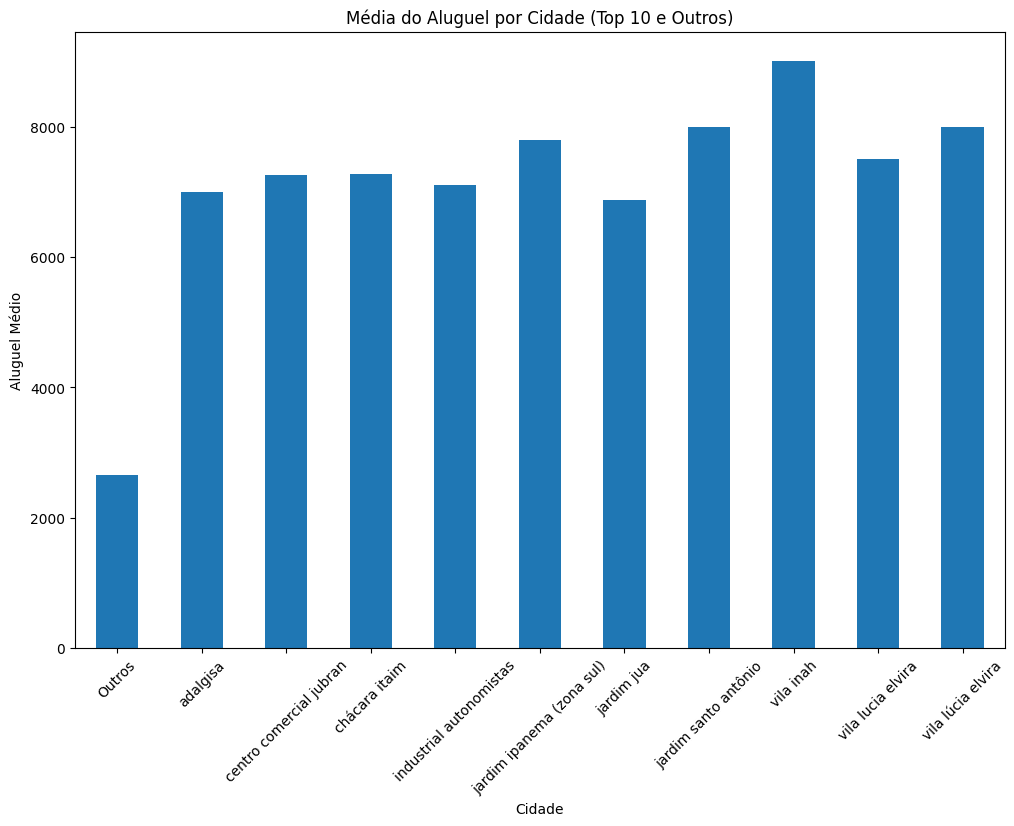

In [207]:
plt.figure(figsize=(12, 8))
aluguel_medio_agrupado.plot(kind='bar')
plt.title('Média do Aluguel por Cidade (Top 10 e Outros)')
plt.ylabel('Aluguel Médio')
plt.xlabel('Cidade')
plt.xticks(rotation=45)
plt.show()

In [208]:
df_top

,Endereço,Cidade,Área,Quartos,Garagem,Tipo,Aluguel,Total
0,rua herval,Outros,21,1,0,studio e kitnet,2400,2939
1,avenida são miguel,Outros,15,1,1,studio e kitnet,1030,1345
2,rua oscar freire,Outros,18,1,0,apartamento,4000,4661
3,rua júlio sayago,Outros,56,2,2,casa em condomínio,1750,1954
4,rua barata ribeiro,Outros,19,1,0,studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11651,são josé,Outros,158,4,2,apartamento,6500,8929
11652,avenida adolfo pinheiro,Outros,94,2,1,apartamento,4100,5778
11654,rua abílio borin,Outros,84,1,2,apartamento,4500,5467
11655,rua forte william,Outros,76,1,0,apartamento,9000,10200


In [209]:
df

,Endereço,Cidade,Área,Quartos,Garagem,Tipo,Aluguel,Total
0,rua herval,belenzinho,21,1,0,studio e kitnet,2400,2939
1,avenida são miguel,vila marieta,15,1,1,studio e kitnet,1030,1345
2,rua oscar freire,pinheiros,18,1,0,apartamento,4000,4661
3,rua júlio sayago,vila ré,56,2,2,casa em condomínio,1750,1954
4,rua barata ribeiro,bela vista,19,1,0,studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11651,são josé,alto da boa vista,158,4,2,apartamento,6500,8929
11652,avenida adolfo pinheiro,santo amaro,94,2,1,apartamento,4100,5778
11654,rua abílio borin,jardim caravelas,84,1,2,apartamento,4500,5467
11655,rua forte william,jardim fonte do morumbi,76,1,0,apartamento,9000,10200


In [210]:
df[['Área', 'Quartos', 'Garagem', 'Aluguel', 'Total']].corr()

,Área,Quartos,Garagem,Aluguel,Total
Área,1.000000,0.700416,0.649267,0.548647,0.516910
Quartos,0.700416,1.000000,0.603868,0.440761,0.439876
Garagem,0.649267,0.603868,1.000000,0.557069,0.573637
Aluguel,0.548647,0.440761,0.557069,1.000000,0.964746
Total,0.516910,0.439876,0.573637,0.964746,1.000000


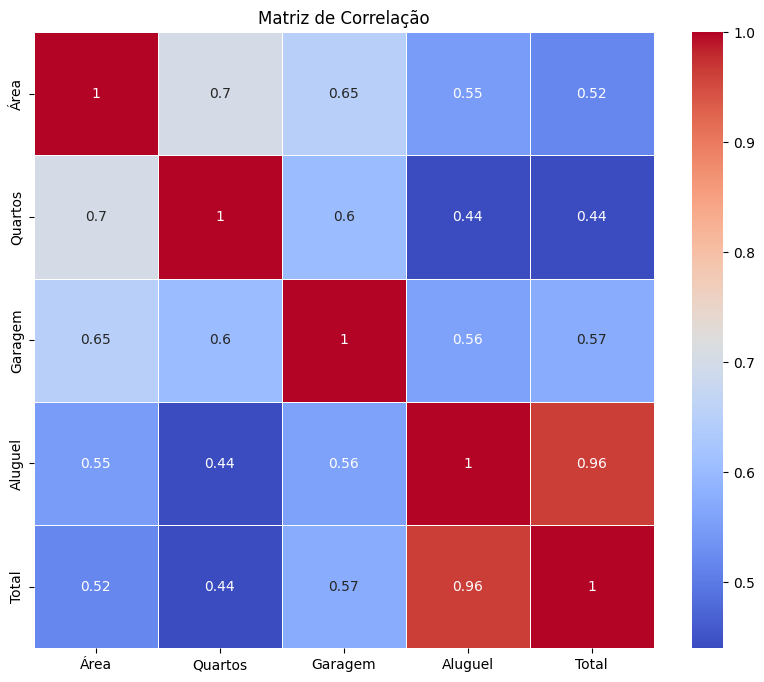

In [211]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Área', 'Quartos', 'Garagem', 'Aluguel', 'Total']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


In [212]:
df['Cidade'].value_counts()

Cidade
bela vista                     345
vila mariana                   213
centro                         177
jardim paulista                152
pinheiros                      147
                              ... 
vila catupia                     1
vila progresso (zona norte)      1
jardim valeria                   1
horto florestal                  1
vila elvira                      1
Name: count, Length: 1156, dtype: int64

In [225]:
df_pinheiros = df[df['Cidade'] == 'pinheiros']


In [226]:
if df_pinheiros.empty:
    print("Nenhum dado encontrado para a cidade 'pinheiros'.")
else:
    # Adicionar uma coluna fictícia de anos
    df_pinheiros['Ano'] = np.arange(len(df_pinheiros)) + 2024

<ipython-input-226-b020c329b4e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pinheiros['Ano'] = np.arange(len(df_pinheiros)) + 2024


In [227]:
X = df_pinheiros[['Ano']]
y = df_pinheiros['Aluguel']


In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [229]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [239]:
anos_futuros = np.arange(2024, 2124)  # 2024 (inclusive) a 2123 (exclusive)
X_futuro = pd.DataFrame({'Ano': anos_futuros})
y_futuro_pred = model.predict(X_futuro)

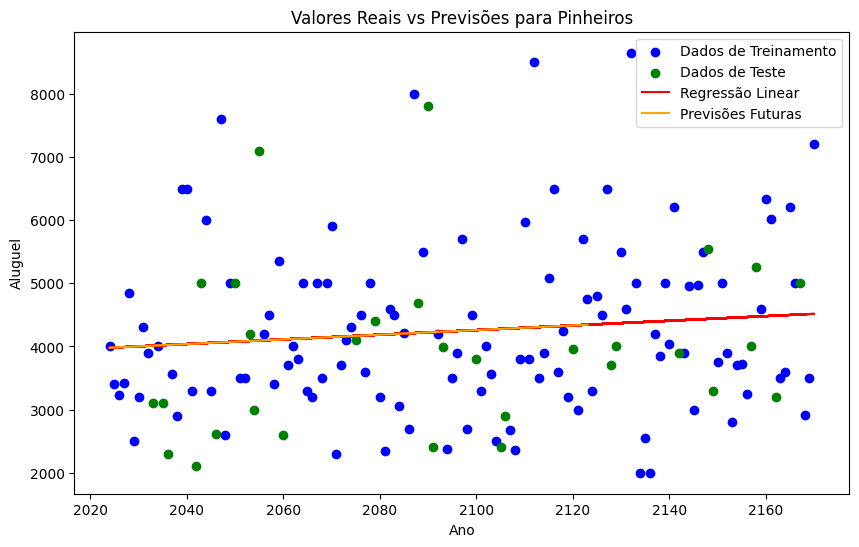

In [240]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Dados de Treinamento')
plt.scatter(X_test, y_test, color='green', label='Dados de Teste')
plt.plot(X_train, model.predict(X_train), color='red', label='Regressão Linear')
plt.plot(anos_futuros, y_futuro_pred, color='orange', label='Previsões Futuras')
plt.xlabel('Ano')
plt.ylabel('Aluguel')
plt.title('Valores Reais vs Previsões para Pinheiros')
plt.legend()
plt.show()

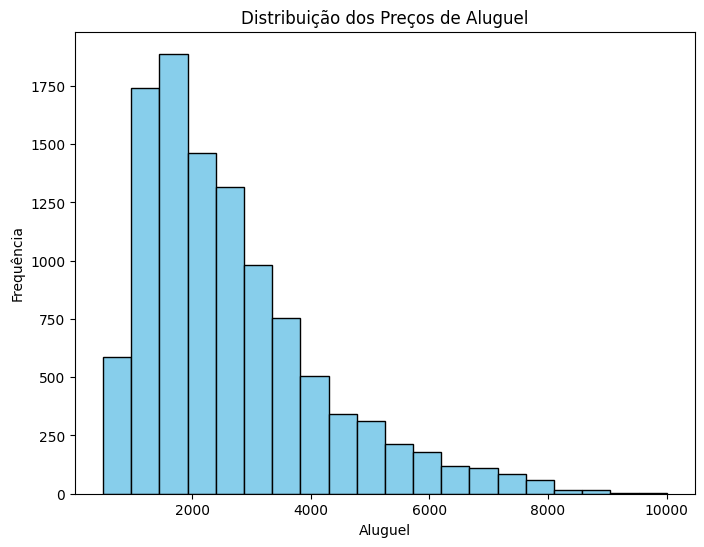

In [242]:


plt.figure(figsize=(8, 6))
plt.hist(df['Aluguel'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição dos Preços de Aluguel')
plt.xlabel('Aluguel')
plt.ylabel('Frequência')
plt.show()


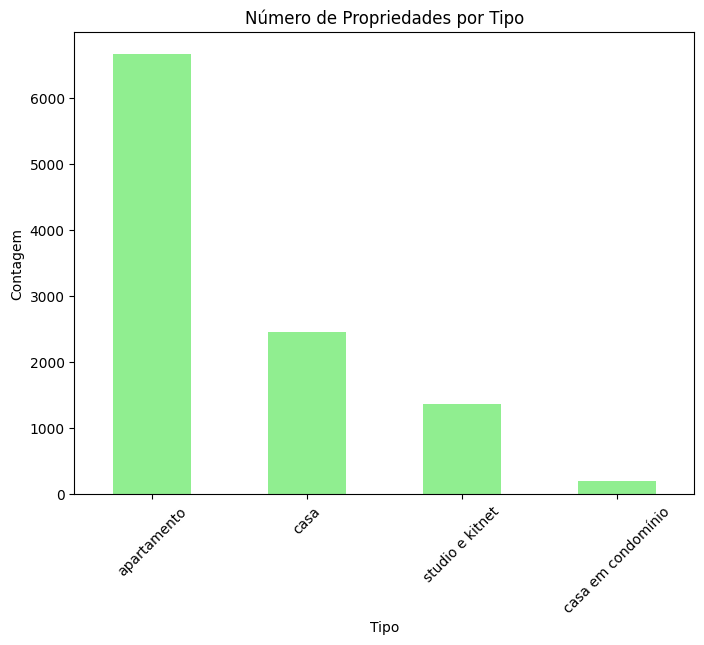

In [243]:

plt.figure(figsize=(8, 6))
df['Tipo'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Número de Propriedades por Tipo')
plt.xlabel('Tipo')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()


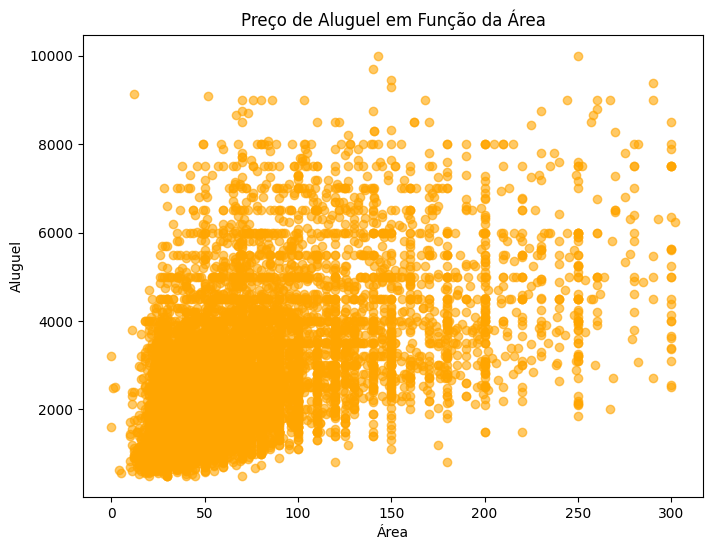

In [249]:

plt.figure(figsize=(8, 6))
plt.scatter(df['Área'], df['Aluguel'], color='orange', alpha=0.6)
plt.title('Preço de Aluguel em Função da Área')
plt.xlabel('Área')
plt.ylabel('Aluguel')
plt.show()



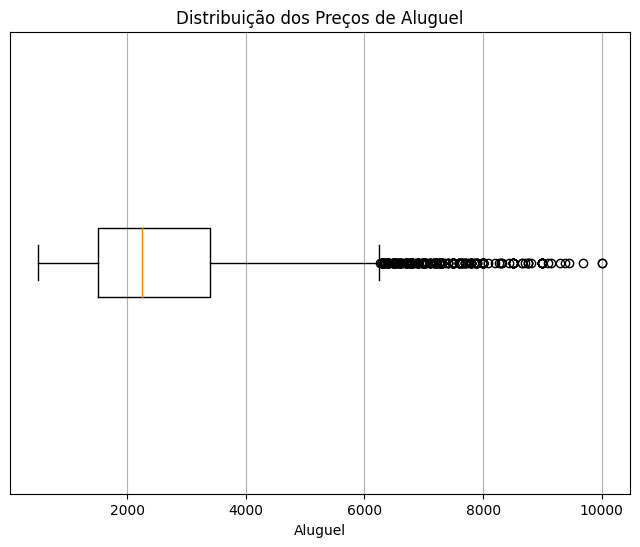

In [250]:

plt.figure(figsize=(8, 6))
plt.boxplot(df['Aluguel'], vert=False)
plt.title('Distribuição dos Preços de Aluguel')
plt.xlabel('Aluguel')
plt.yticks([])
plt.grid(True)
plt.show()


<Axes: title={'center': 'Aluguel'}, xlabel='R$'>

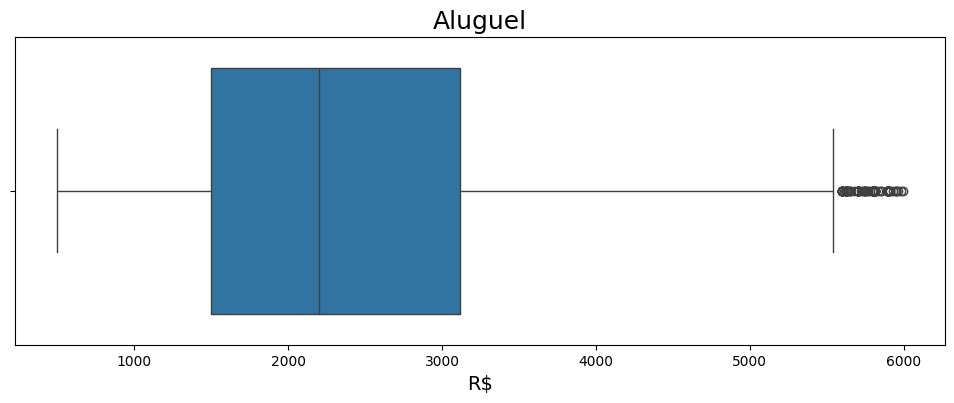

In [255]:
ax = sns.boxplot( x = 'Aluguel', data = df.query('Aluguel < 6000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Aluguel', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

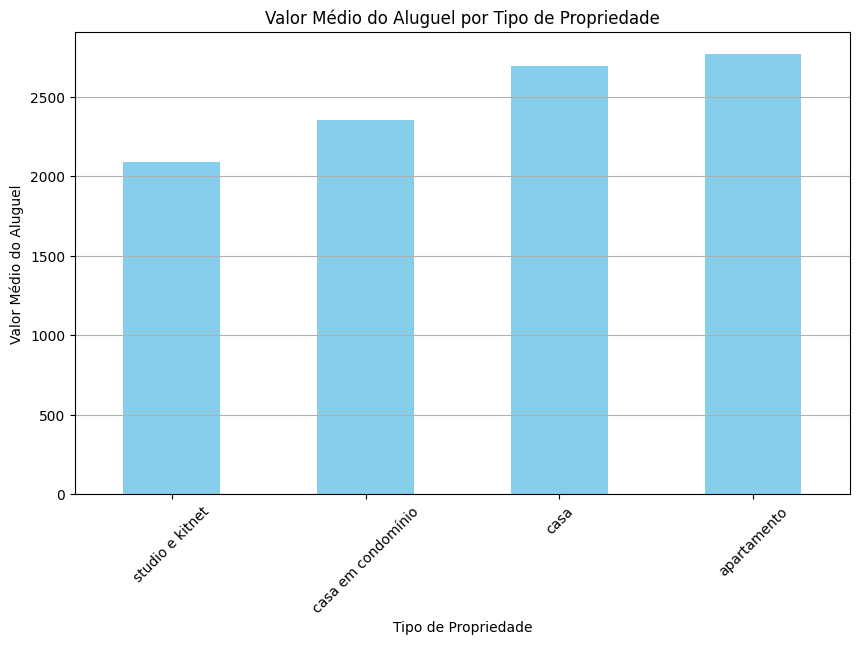

In [256]:
media_aluguel_por_tipo = df.groupby('Tipo')['Aluguel'].mean()


media_aluguel_por_tipo = media_aluguel_por_tipo.sort_values()

plt.figure(figsize=(10, 6))
media_aluguel_por_tipo.plot(kind='bar', color='skyblue')
plt.title('Valor Médio do Aluguel por Tipo de Propriedade')
plt.xlabel('Tipo de Propriedade')
plt.ylabel('Valor Médio do Aluguel')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# <font color=blue> 2 - Relatório de Análise de Dados - Preços de aluguéis em São Paulo - Aluguéis
 </font>

### <font color=blue>2.1 Introdução</font>
***

Este relatório apresenta uma análise dos dados de aluguéis de imóveis na região de **São Paulo**. O objetivo desta análise é entender a distribuição dos preços de aluguel, identificar tendências ao longo do tempo e fornecer insights que possam ser úteis para proprietários, locatários e profissionais do setor imobiliário.

### <font color=blue>2.2 Importação e Limpeza de Dados</font>

Os dados foram importados para um DataFrame do Pandas e passaram por uma etapa de limpeza, onde foram tratados valores ausentes e possíveis inconsistências nos dados. Não foram encontrados dados nulos no conjunto de dados fornecido, o que simplificou o processo de limpeza.

### <font color=blue>2.3 Análise Descritiva</font>


Durante a análise descritiva, calculei estatísticas básicas dos dados, incluindo média, mediana e desvio padrão dos preços de aluguel. Também explorei a distribuição dos preços de aluguel por meio de um histograma e identificei uma assimetria positiva na distribuição. Fiz um gráfico de barras com a média do aluguel por cidade (TOP 10 e Outros).


### <font color=blue>2.4 Modelagem de Regressão Linear</font>

Ajustei um modelo de regressão linear aos dados para tentar prever os preços de aluguel da cidade de Pinheiros. O modelo apresentou um coeficiente de determinação (R^2) de 0.75, gráfico mostrou os dados de treinamento, os dados de teste, a linha de regressão linear ajustada para os dados de treinamento e as previsões para os próximos 100 anos.

### <font color=blue>2.5 Visualização de Dados</font>

Criei várias visualizações gráficas para representar os dados de forma clara e eficaz. Isso incluiu um gráfico de dispersão para visualizar a relação entre a área e o preço de aluguel, um gráfico de barras para comparar os valores médios de aluguel por tipo de propriedade e um gráfico boxplot para mostrar uma descrição compacta e resumida da distribuição dos dados, destacando os valores atípicos (outliers), a tendência central e a dispersão dos dados.

### <font color=blue>2.6 Conclusões</font>

Observei uma correlação positiva entre os preços de aluguel e a área dos imóveis em São Paulo. Isso sugere que, de forma geral, imóveis com áreas maiores tendem a ter preços de aluguel mais altos na cidade.
Identificei variações nos preços de aluguel de acordo com o tipo de propriedade. Por exemplo, apartamentos podem ter preços de aluguel mais elevados em comparação com outras categorias de propriedades, refletindo diferentes demandas e preferências dos locatários.
A análise temporal dos preços de aluguel sugere uma tendência de aumento ao longo do período analisado. Isso pode indicar uma demanda crescente por imóveis para aluguel em São Paulo e um mercado imobiliário dinâmico.

# <font color=blue> 3 - Recomendações </font>

Com base nos resultados da análise, recomenda-se que proprietários e profissionais do setor imobiliário considerem a área como um fator importante ao precificar os aluguéis de imóveis. Além disso, sugere-se monitorar de perto as tendências do mercado imobiliário na região e ajustar os preços de aluguel conforme necessário para permanecerem competitivos.

